En general seria util poder tener algun shape o geojson. Poruqe el kml lo baoj y no lo abre con qgis (v14 o v18). Vajo el csv y reconsturyo los poligonos. Para manzanas funciona bien. Para radios tengo problemas. Te paso cada caso

In [5]:
import geopandas as gpd
import os
import json
import pandas as pd
from string import replace
from shapely import geometry
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def textoApoli(stringCoords):
    callesPoli = stringCoords.replace('0.0 ','').split(',')
    callesPoli = callesPoli[0:-1]

    lista = []
    for i in range(len(callesPoli)):
        if i % 2 == 0:
            punto = [float(callesPoli[i]),float(callesPoli[i+1])]
            lista.append(punto)
        else:
            pass
    polygon = geometry.Polygon(lista)
    return polygon

## manzanas

In [7]:
data = pd.read_csv('manzanas.csv')
data = data.iloc[:,[2,3]]
data.columns = ['coords','tipo']
data = data.loc[data.tipo == 'Polygon Inner Boundary',:]
data['geometry'] = data.coords.map(textoApoli)
data.head()

,coords,tipo,geometry
1,"-63.23976119742675,-37.45725926272377,0.0 -63....",Polygon Inner Boundary,POLYGON ((-63.23976119742675 -37.4572592627237...
2,"-63.23981305454304,-37.460301595881454,0.0 -63...",Polygon Inner Boundary,POLYGON ((-63.23981305454304 -37.4603015958814...
3,"-63.241806494307596,-37.46015847807085,0.0 -63...",Polygon Inner Boundary,POLYGON ((-63.2418064943076 -37.46015847807085...
5,"-63.253822947775454,-37.45265270626447,0.0 -63...",Polygon Inner Boundary,POLYGON ((-63.25382294777545 -37.4526527062644...
6,"-63.255212711376274,-37.4581093475905,0.0 -63....",Polygon Inner Boundary,POLYGON ((-63.25521271137627 -37.4581093475905...


In [8]:
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(data, crs=crs, geometry=data.geometry)

In [9]:
geo_df.to_file('manzanas')

Faltan manzanas en berazategui, puede ser??

## radios

El problema con los radios es que algunos poligonos no se cierran bien y tienen una isla en el medio. Y tampoco se las la proyeccion de coordenadas. En el set de manzanas claramente esta en latlong, pero este no se, tengo que adivinarlo. Use 22185 que es posgar 94 franja 5, pero no se si es el que va.  Estaria bueno que lo cambien a latlong o indiquen que proyeccion se usa

El index de la fila con problemas esta en la lista problems que detecto al final

In [10]:
def detectoErrores(stringCoords):
    callesPoli = stringCoords.replace('MULtipoLYGON (((','')
    callesPoli = callesPoli.replace(')))','')
    callesPoli = callesPoli.split(',')

    lista = []
    for i in range(len(callesPoli)):
        coords = callesPoli[i].split(' ')  
        punto = [float(coords[0]),float(coords[1])]
        lista.append(punto)
    polygon = geometry.Polygon(lista)
    return polygon

In [11]:
def textoApoliRadios(stringCoords):
    callesPoli = stringCoords.replace('MULtipoLYGON ','')
    callesPoli = callesPoli.replace('(','')
    callesPoli = callesPoli.replace(')','')
    callesPoli = callesPoli.split(',')

    lista = []
    for i in range(len(callesPoli)):
        coords = callesPoli[i].split(' ')  
        punto = [float(coords[0]),float(coords[1])]
        lista.append(punto)
    polygon = geometry.Polygon(lista)
    return polygon

In [12]:
radios = pd.read_csv('radios.csv')
radios['geometry'] = radios.WKT.map(textoApoliRadios)
radios.head()

,WKT,clave_radio,codigo_partido,codigo_localidad,codigo_fraccion,codigo_radio,tipo,geometry
0,"MULtipoLYGON (((5206321.5461 5943948.9766,5213...",60070000105,7,0.0,1,5,RURAL,"POLYGON ((5206321.5461 5943948.9766, 5213303.5..."
1,"MULtipoLYGON (((5210111.0 5919549.5,5206678 59...",60070000108,7,0.0,1,8,RURAL,"POLYGON ((5210111 5919549.5, 5206678 5915885, ..."
2,"MULtipoLYGON (((5236564 5888720,5236012 588817...",60070000305,7,0.0,3,5,RURAL,"POLYGON ((5236564 5888720, 5236012 5888179, 52..."
3,"MULtipoLYGON (((5212246.5 5881357.0,5211934.0 ...",60070800406,7,80.0,4,6,URBANO,"POLYGON ((5212246.5 5881357, 5211934 5881030.5..."
4,"MULtipoLYGON (((5211611 5884224,5211594 588397...",60070800402,7,80.0,4,2,URBANO,"POLYGON ((5211611 5884224, 5211594 5883970, 52..."


In [13]:
crs = {'init': 'epsg:22185'}
radios = gpd.GeoDataFrame(radios, crs=crs, geometry=radios.geometry)

In [15]:
radios.to_file('radios.GeoJSON', driver='GeoJSON')

In [16]:
problems = []
for i in range(radios.shape[0]):
    try:
        detectoErrores(radios.WKT[i])
    except:
        problems.append(i)

Filas con problemas:

In [17]:
problems

[130,
 181,
 784,
 1067,
 1131,
 1375,
 1644,
 1714,
 1723,
 1854,
 2271,
 2279,
 2297,
 2405,
 2416,
 2471,
 2553,
 2638,
 2641,
 2706,
 2707,
 2712,
 2717,
 2724,
 2750,
 2770,
 2803,
 2822,
 2866,
 2946,
 2978,
 3019,
 3148,
 3301,
 3530,
 3620,
 3622,
 3627,
 3705,
 3796,
 4383,
 4401,
 5111,
 5197,
 5207,
 5270,
 5284,
 5285,
 6333,
 6990,
 6991,
 7025,
 7044,
 7052,
 7678,
 7720,
 7726,
 10950,
 11030,
 11037,
 11098,
 12560,
 12989,
 13811,
 13821,
 13829,
 13851,
 14019,
 14020,
 14034,
 14036,
 14038,
 14046,
 14049,
 14057,
 14187,
 14224,
 14225,
 14228,
 14246,
 14261,
 14287,
 14301,
 14304,
 14307,
 14346,
 14380,
 14450,
 14553,
 14584,
 14626,
 14666,
 15012,
 15141,
 15179,
 15184,
 15193,
 15208,
 15216,
 15232,
 15831,
 15922,
 15928,
 15940,
 16071,
 16101,
 16102,
 16103,
 16166,
 16176,
 16252,
 16448,
 16464,
 16489,
 16517,
 16518,
 17341,
 17362,
 17839,
 17840,
 17970,
 18110,
 18253,
 18256,
 18919,
 18921,
 18923,
 19422,
 19430,
 19453,
 19455,
 19549]

Aca hay un ejemplo de los errores que te digo en como se conforma el poligono: 

Self-intersection at or near point 5458119.1774364049 5813942.406233483


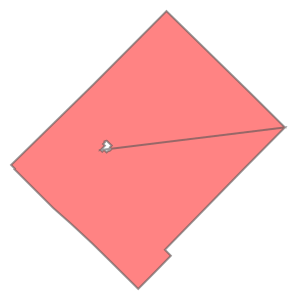

In [18]:
textoApoliRadios(radios.WKT[problems[0]])
